# Safest Neighborhoods in Vancouver, BC
###### Coursera Applied Data Science Capstone Project - The Battle of Neighborhoods
 




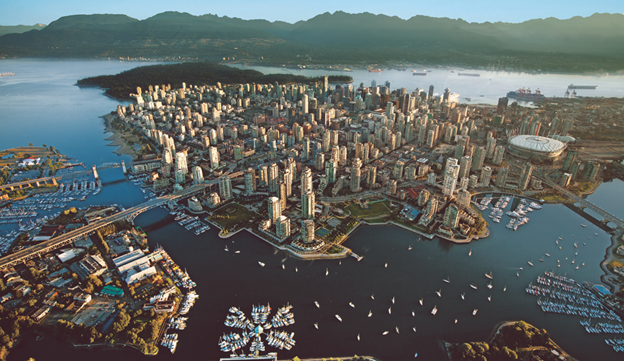







# Business Problem section

### Introduction

Vancouver is a coastal seaport city in western Canada, located in the Lower Mainland region of British Columbia. As the most populous city in the province, the 2016 census recorded 631,486 people in the city, up from 603,502 in 2011. The Greater Vancouver area had a population of 2,463,431 in 2016, making it the third-largest metropolitan area in Canada. Vancouver has the highest population density in Canada, with over 5,400 people per square kilometre, which makes it the fifth-most densely populated city with over 250,000 residents in North America, behind New York City, Guadalajara, San Francisco, and Mexico City. Vancouver is one of the most ethnically and linguistically diverse cities in Canada: 52% of its residents are not native English speakers, 48.9% are native speakers of neither English nor French, and 50.6% of residents belong to visible minority groups. 
Vancouver is consistently named as one of the top five worldwide cities for livability and quality of life, and the Economist Intelligence Unit acknowledged it as the first city ranked among the top ten of the world's most well-living cities for ten consecutive years. In 2011, the city planned to become the greenest city in the world by 2020. Vancouverism is the city's urban planning design philosophy.

### Background

Safety is the top concern when moving to a new area. If you don’t feel safe in your own home, you you’re not going to be able to enjoy living there.

### Business Problem
This project aims to select the safest borough in Vancouver, BC Canada based on the total crime, explore the neighborhoods of that borough to find the 10 most common venues in each neighborhood and finally cluster the neighborhoods using K-Mean clustering.

#### Key Questions

A.	What is the most common crime in Vancouver?
B.	Which of the boroughs have the highest crime rates?
C.	Which of the boroughs have the lowest crime rates?
D.	Identify the top 10 venues in each neighborhood
	
#### Interest and stakeholders
Expats who are considering to relocate to Vancouver and Real States companies will be interested to identify the safest borough in Vancouver and explore its neighborhoods and common venues around each neighborhood.

# Data section

The data acquisition for this project is a combination of data from two sources:

•	The first data source of the project uses Vancouver crime data. This dataset contains the Vancouver Police Department's crime records from 2013 to 2019. It can be found at: https://vancouver.ca/police/organization/planning-research-audit/stats-crime-rate.html
•	Foursquare API as its prime data gathering source as it has a database of more than 105 million places, especially their places API which provides the ability to perform location search, location sharing and details about a business. Photos, tips and reviews jolted by Foursquare users can also be used in many productive ways to add value to the results. 

### Work Flow

HTTP requests would be made to this Foursquare API server using postal codes of the Vancouver city neighborhoods to pull the location information (Latitude and Longitude).
Foursquare API search feature would be enabled to collect the nearby places of the neighborhoods. Due to http request limitations the number of places per neighborhood parameter would reasonably be set to 100 and the radius parameter would be set to 700.
Folium- Python visualization library would be used to visualize the neighborhoods cluster distribution of Vancouver city over an interactive leaflet map.
Extensive comparative analysis of two randomly picked neighborhoods world be carried out to derive the desirable insights from the outcomes using python’s scientific libraries Pandas, NumPy and Scikit-learn.
Unsupervised machine learning algorithm K-mean clustering would be applied to form the clusters of different categories of places residing in and around the neighborhoods. These clusters from each of those two chosen neighborhoods would be analyzed individually collectively and comparatively to derive the conclusions.


### 1. Python packages and Dependencies:
• Pandas - Library for Data Analysis • NumPy – Library to handle data in a vectorized manner • JSON – Library to handle JSON files • Geopy – To retrieve Location Data • Requests – Library to handle http requests • Matplotlib – Python Plotting Module • Sklearn – Python machine learning Library • Folium – Map rendering Library

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

!pip install seaborn
import seaborn as sns
!pip install scipy

# Matplotlib and associated plotting modules
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
!pip install squarify

# import k-means from clustering stage
from sklearn.cluster import KMeans
#libraries for Data preprocess

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

# for webscraping import Beautiful Soup 
from bs4 import BeautifulSoup

#libraries for plotting
!pip install plotly==4.5.2
!pip install psutil requests
!pip install plotly-geo==1.0.0
!pip install chart-studio==1.0.0
import plotly.graph_objects as go

import xml

!pip install folium # map rendering library
!conda install -c conda-forge folium=0.5.0 --yes
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

import time
import random # library for random number generation

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.21.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

### 2. Load Data into a DataFrame

Hidden Cell personal data. I used IBM boto3 to load data.
Code used:

import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0
Personel credentials
#add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
#If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
crime_records = pd.read_csv(body)
crime_records.head()

In [2]:
# The code was removed by Watson Studio for sharing.

TYPE  YEAR  MONTH  DAY  HOUR  MINUTE  \
0  Break and Enter Commercial  2012     12   14     8      52   
1  Break and Enter Commercial  2019      3    7     2       6   
2  Break and Enter Commercial  2019      8   27     4      12   
3  Break and Enter Commercial  2014      8    8     5      13   
4  Break and Enter Commercial  2005     11   14     3       9   

     HUNDRED_BLOCK NEIGHBOURHOOD              X             Y  
0              NaN      Oakridge  491285.000000  5.453433e+06  
1    10XX SITKA SQ      Fairview  490612.964805  5.457110e+06  
2  10XX ALBERNI ST      West End  491007.779775  5.459174e+06  
3  10XX ALBERNI ST      West End  491015.943352  5.459166e+06  
4  10XX ALBERNI ST      West End  491021.385727  5.459161e+06

### 3. Initial data exploration and summary 

#### 3.0 Missing data detection

In [104]:
# Reusable function for detecting missing data
def missing_value_describe(data):
    # check missing values in training data
    missing_value_stats = (data.isnull().sum() / len(data)*100)
    missing_value_col_count = sum(missing_value_stats > 0)
    missing_value_stats = missing_value_stats.sort_values(ascending=False)[:missing_value_col_count]
    print("Number of columns with missing values:", missing_value_col_count)
    if missing_value_col_count != 0:
        # print out column names with missing value percentage
        print("\nMissing percentage (desceding):")
        print(missing_value_stats)
    else:
        print("No missing data!!!")
missing_value_describe(crime_records)

Number of columns with missing values: 4

Missing percentage (desceding):
NEIGHBOURHOOD    10.409943
Y                 0.019230
X                 0.019230
HUNDRED_BLOCK     0.002083
dtype: float64


From the above missing data examination, we have 4 columns with missing data: they are NEIGHHOURHOOD (10.42% missing), MINUTE(10.02% missing), HOUR(10.02% missing), and HUNDRED_BLOCK(0.002% missing).

The missing percentage of MINUTE and HOUR columns are the same we are going to disregard the missing information. However, the HUNDRED_BLOCk, which is the physical address, has ~10% lower missing value than the NEIGHBOURHOOD column. The missing data is due to Statistics Canada definition of neighbourhoods within municipalities. Neighbourhoods within the City of Vancouver are based on the census tract (CT) concept within census metropolitan area (CMA). The missing NEIGHBOURHOOD columns might be caused by unlabeled neighbourhoods in the Statistics Canada dataset or they just aren't labeled.
I am thinking about create a dictionary for each street-neighbourhood pair to predict the missing neighbourhood.

#### 3.1 Dimension of dataset 

In [105]:
print("the dimension:", crime_records.shape)

the dimension: (624038, 10)


We have over 600K rows and 10 columns in our dataset.

### 4. Distribution of each type of crime:

In [106]:
crime_records['TYPE'].value_counts()

Theft from Vehicle                                        209609
Mischief                                                   83970
Break and Enter Residential/Other                          66378
Other Theft                                                64611
Offence Against a Person                                   62078
Theft of Vehicle                                           41528
Break and Enter Commercial                                 38916
Theft of Bicycle                                           31112
Vehicle Collision or Pedestrian Struck (with Injury)       25294
Vehicle Collision or Pedestrian Struck (with Fatality)       290
Homicide                                                     252
Name: TYPE, dtype: int64

Text(0, 0.5, 'crime count')

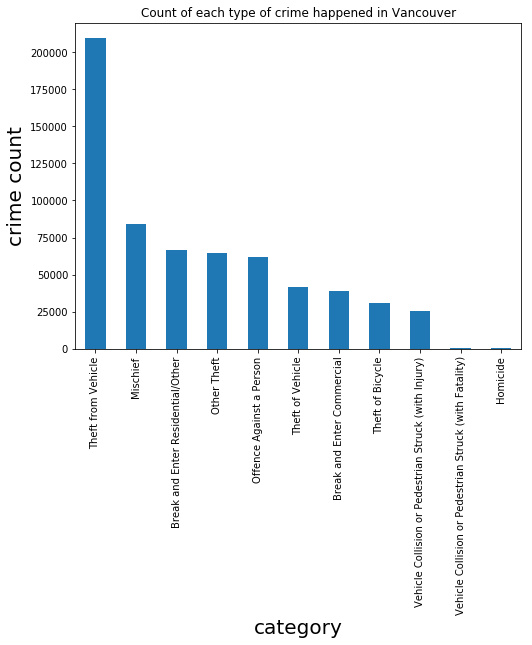

In [107]:
# crime type distribution
nameplot = crime_records['TYPE'].value_counts().plot.bar(title='Count of each type of crime happened in Vancouver', figsize=(8,6))
nameplot.set_xlabel('category',size=20)
nameplot.set_ylabel('crime count',size=20)

In [108]:
fig = go.Figure(data=go.Scatterpolar(
  r=crime_records['TYPE'].value_counts(),
  theta=crime_records['TYPE'].value_counts().index,
  fill='toself'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
        visible=True
     ),
    ),
    showlegend=False,
    title_text="Vancouver Crime Record Radar Chart by Crime Type",
    autosize=True
)

fig.show()

It appears that the most common type of crime is associated with vehicle in Vancouver: Theft from Vehicle, Theft of Bicycle and Vehicle Collision. Since 2003, there are 209609 crime categorized as "Theft from Vehicle".

### 5. Has the crime decreased over the years in Vancouver?

In [109]:
"""
Create empty dataframe to store the crime count over the years in Vancouver
"""
# year values
year_labels = sorted(crime_records["YEAR"].unique())

# crime types
crime_types = sorted(crime_records["TYPE"].unique().tolist())

# Create the pandas DataFrame 
crime_count_by_year = pd.DataFrame(columns =["year"]) 
crime_count_by_year["year"] = year_labels
crime_count_by_year

year
0   2003
1   2004
2   2005
3   2006
4   2007
5   2008
6   2009
7   2010
8   2011
9   2012
10  2013
11  2014
12  2015
13  2016
14  2017
15  2018
16  2019

In [110]:
# gather yearly count of crime in Vancouver
for current_type in crime_types:
    current_crime = crime_records[crime_records["TYPE"]==current_type]
    current_crime_counts = current_crime["YEAR"].value_counts(sort=False)
    current_crime_index = current_crime_counts.index.tolist()
    current_crime_index, current_crime_counts = zip(*sorted(zip(current_crime_index, current_crime_counts)))
    crime_count_by_year[current_type] = current_crime_counts
crime_count_by_year

year  Break and Enter Commercial  Break and Enter Residential/Other  \
0   2003                        3197                               6883   
1   2004                        3283                               6538   
2   2005                        2639                               5542   
3   2006                        2844                               5674   
4   2007                        2436                               4996   
5   2008                        2224                               4432   
6   2009                        1858                               3497   
7   2010                        1657                               3270   
8   2011                        1749                               3231   
9   2012                        1687                               3311   
10  2013                        1774                               3025   
11  2014                        2244                               3044   
12  2015                        2457                               3120   
13  2016                        2685                               2996   
14  2017                        2193                               2468   
15  2018                        2025                               2397   
16  2019                        1964                               1954   

    Homicide  Mischief  Offence Against a Person  Other Theft  \
0         18      6391                      3518         2582   
1         22      5601                      3802         2605   
2         22      5062                      3779         2611   
3         17      5184                      4345         2966   
4         19      4810                      4413         3024   
5         18      5276                      4225         3142   
6         18      4429                      3893         3662   
7         10      4506                      3745         3432   
8         15      4828                      3883         3562   
9          8      4243                      3801         3630   
10         7      4191                      3692         3488   
11         9      4518                      3162         4210   
12        15      4191                      3225         4679   
13        12      4600                      3192         5701   
14        17      5391                      3227         5504   
15        15      5744                      3142         4947   
16        10      5005                      3034         4866   

    Theft from Vehicle  Theft of Bicycle  Theft of Vehicle  \
0                17744              1418              6361   
1                18204              1230              6102   
2                16554              1416              5031   
3                14734              1467              3682   
4                12226              1203              3305   
5                11298              1176              2420   
6                10007              1641              1882   
7                 8612              1668              1467   
8                 7435              1517              1094   
9                 8097              1817              1151   
10                8341              2034              1034   
11               10140              2461              1292   
12               10546              3064              1372   
13               12816              2638              1481   
14               12960              2201              1498   
15               15005              2165              1148   
16               14890              1996              1208   

    Vehicle Collision or Pedestrian Struck (with Fatality)  \
0                                                  25        
1                                                  22        
2                                                  33        
3                                                  20        
4                                                  24  

Let's visualize the change of crime over the years across all the types of crime:

In [111]:
# Create traces
fig = go.Figure()
for current_crime in crime_types:
    current_type_count = crime_count_by_year[current_crime]
    fig.add_trace(
        go.Scatter(
            x=year_labels, 
            y=current_type_count,
            mode='lines+markers',
            name=current_crime
        )
    )
# Edit the layout
fig.update_layout(title='Crimes Over the Years in Vancouver by Type',
                    xaxis_title='Year',
                    yaxis_title='Absolute Change',
                    autosize=True,
                    height=570
                 )

fig.update_layout(legend_orientation="h")

fig.show()

Percent Change of Crimes Over the Years

In [112]:
# calculate percent change of crime for each type of crime
crime_count_by_year_percent_change = crime_count_by_year[crime_count_by_year.columns[1:]].pct_change() * 100
crime_count_by_year_percent_change["year"] = year_labels
crime_count_by_year_percent_change

Break and Enter Commercial  Break and Enter Residential/Other   Homicide  \
0                          NaN                                NaN        NaN   
1                     2.690022                          -5.012349  22.222222   
2                   -19.616205                         -15.234017   0.000000   
3                     7.768094                           2.381812 -22.727273   
4                   -14.345992                         -11.949242  11.764706   
5                    -8.702791                         -11.289031  -5.263158   
6                   -16.456835                         -21.096570   0.000000   
7                   -10.818084                          -6.491278 -44.444444   
8                     5.552203                          -1.192661  50.000000   
9                    -3.544883                           2.476014 -46.666667   
10                    5.157084                          -8.637874 -12.500000   
11                   26.493799                           0.628099  28.571429   
12                    9.491979                           2.496715  66.666667   
13                    9.279609                          -3.974359 -20.000000   
14                  -18.324022                         -17.623498  41.666667   
15                   -7.660739                          -2.876823 -11.764706   
16                   -3.012346                         -18.481435 -33.333333   

     Mischief  Offence Against a Person  Other Theft  Theft from Vehicle  \
0         NaN                       NaN          NaN                 NaN   
1  -12.361133                  8.072769     0.890782            2.592426   
2   -9.623282                 -0.604945     0.230326           -9.063942   
3    2.410115                 14.977507    13.596323          -10.994322   
4   -7.214506                  1.565017     1.955496          -17.021854   
5    9.688150                 -4.260140     3.902116           -7.590381   
6  -16.053829                 -7.857988    16.549968          -11.426801   
7    1.738541                 -3.801695    -6.280721          -13.940242   
8    7.146028                  3.684913     3.787879          -13.666976   
9  -12.116819                 -2.111769     1.909040            8.903833   
10  -1.225548                 -2.867666    -3.911846            3.013462   
11   7.802434                -14.355363    20.699541           21.568157   
12  -7.237716                  1.992410    11.140143            4.003945   
13   9.759007                 -1.023256    21.842274           21.524749   
14  17.195652                  1.096491    -3.455534            1.123596   
15   6.547950                 -2.634025   -10.119913           15.779321   
16 -12.865599                 -3.437301    -1.637356           -0.766411   

    Theft of Bicycle  Theft of Vehicle  \
0                NaN               NaN   
1         -13.258110         -4.071687   
2          15.121951        -17.551622   
3           3.601695        -26.813755   
4         -17.995910        -10.239001   
5          -2.244389        -26.777610   
6          39.540816        -22.231405   
7           1.645338        -22.051010   
8          -9.052758        -25.426040   
9          19.775873          5.210238   
10         11.942763        -10.165074   
11         20.993117         24.951644   
12         24.502235          6.191950   
13        -13.903394          7.944606   
14        -16.565580          1.147873   
15         -1.635620        -23.364486   
16         -7.806005          5.226481   

    Vehicle Collision or Pedestrian Struck (with Fatality)  \
0                                                 NaN        
1                                          -12.000000        
2                                           50.000000        
3                                          -39.393939        
4                                           20.000000        
5                                          -29.166667        
6  

In [113]:
# Create traces
fig = go.Figure()
for current_crime in crime_types:
    current_type_count = crime_count_by_year_percent_change[current_crime]
    fig.add_trace(
        go.Scatter(
            x=year_labels, 
            y=current_type_count,
            mode='lines+markers',
            name=current_crime
        )
    )

    # Edit the layout
fig.update_layout(title='Percent Change of Crimes Over the Years in Vancouver by Type',
                    xaxis_title='Year',
                    yaxis_title='Percent Change (%)',
                    autosize=True,
                    height=570
                 )
fig.update_layout(legend_orientation="h")    
fig.show()   

Using the percentage equals 0 as your reference, you will observe that the crimes of "Vehicle Collision or Pedestrain Struck (with Fatality)", "Theft of Bicyle", and "Homicide" has realtive more positive percentage changes through the years

In [114]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=6, cols=2,
    subplot_titles=[str(i+1) + ". " + crime_types[i] for i in range(len(crime_types))]
)

# function to update row and col for adding subplots
current_row = 1
current_col = 1
def update_row_col(current_row, current_col):
    if current_col < 2:
        current_col += 1
    else:
        current_col = 1
        current_row += 1
    return current_row, current_col

# add trace to the subplot
current_count = 1
for current_crime in crime_types:
    current_type_count = crime_count_by_year[current_crime]
    fig.add_trace(
        go.Scatter(
            x=year_labels, 
            y=current_type_count,
            mode='lines+markers',
            name=current_crime
        ),
        row=current_row, col=current_col
    )
    current_row, current_col = update_row_col(current_row, current_col)

fig.update_layout(
    height=1500, 
    width=900,
    title_text="Crimes in Vancouver Over the Years"
)

fig.update_layout(legend_orientation="h")
fig.show()

### 6. Crime records by month

#### 6.0 What months have the most of the crimes recorded?

Text(0, 0.5, 'crime count')

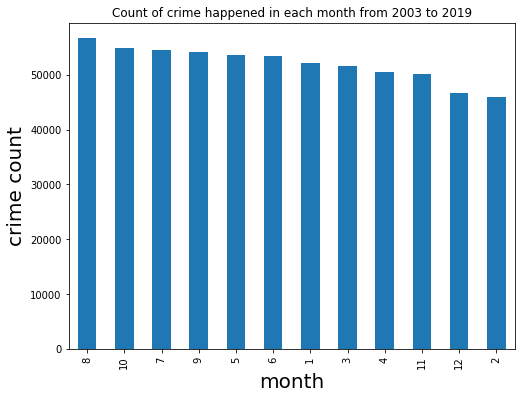

In [115]:
nameplot = crime_records["MONTH"].value_counts().plot.bar(title='Count of crime happened in each month from 2003 to 2019', figsize=(8,6))
nameplot.set_xlabel('month',size=20)
nameplot.set_ylabel('crime count',size=20)

It appears that the months of summer time has more crime recorded than other months.

Text(0, 0.5, 'crime count')

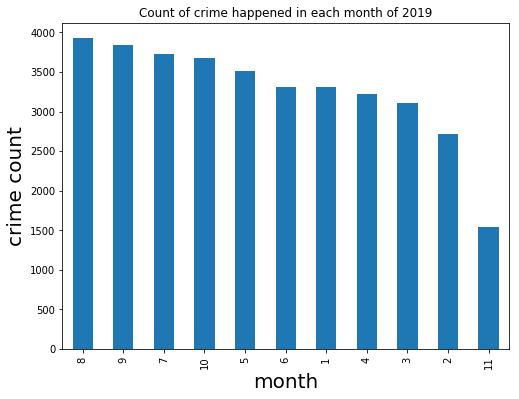

In [116]:
nameplot = crime_records[crime_records["YEAR"] == 2019]["MONTH"].value_counts().plot.bar(title='Count of crime happened in each month of 2019', figsize=(8,6))
nameplot.set_xlabel('month',size=20)
nameplot.set_ylabel('crime count',size=20)

#### 6.1 What are the count of each type of crime happened in each month in 2018?

In [117]:
# get record by month
def get_record_by_month(month_num):
    return crime_records[(crime_records["YEAR"] == 2018) & (crime_records["MONTH"] == month_num)]

# get data in this month
month_dict = {
    1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
    7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"
}
for month in sorted(crime_records["MONTH"].unique()):
    y = get_record_by_month(month)["TYPE"].value_counts()
    x = y.index.tolist()
    x, y = zip(*sorted(zip(x, y)))
    fig = go.Figure([go.Bar(x=x, y=y, text=y, textposition = 'outside')])
    fig.update(layout_title_text="Count of each type of crime happened in " + month_dict[month])
    fig.update_layout(
        yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text="Crime Count")),
        autosize=True,
        width=880,
        height=700,
    )
#     fig.update_xaxes(tickangle=-90)
    fig.show()
    

Overall, "Theft from Vehicle" remains to be the main type of crime happened in Vancouver in 2018 through the months. The 2nd and the 3rd most common crimes are "Mischief" and "Offence Against a Person" in 2018.

### 7. Crime investigation based on location data

We have 4 columns describe the locations of the given crime records. They are: HUNDRED_BLOCK, NEIGHBOURHOOD, X, and Y. Let's explore these columns now.

#### 7.0 How many unique blocks do we have?

In [118]:
len(crime_records["HUNDRED_BLOCK"].unique())

22181

That's a lot of missing blocks. Let explore it.

Text(26.200000000000003, 0.5, 'count')

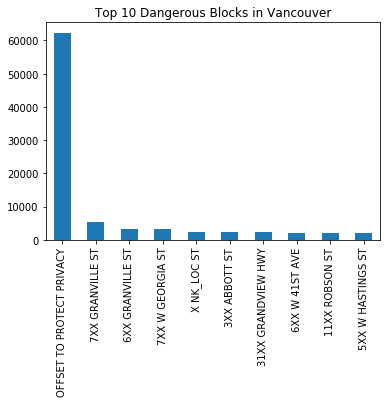

In [119]:
crime_records["HUNDRED_BLOCK"].value_counts()[:10].plot.bar(
    title='Top 10 Dangerous Blocks in Vancouver')
nameplot.set_xlabel('block name',size=20)
nameplot.set_ylabel('count',size=20)

To protect privacy, police labeled about 10% of the data to be "OFFSET TO PROTECT PRIVACY". Let's graph the top 10 crime-populated block without the "OFFSET TO PROTECT PRIVACY" rows

Text(26.200000000000003, 0.5, 'count')

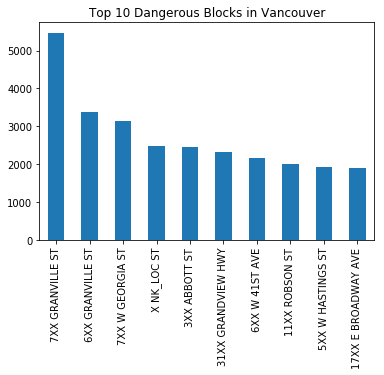

In [120]:
crime_records["HUNDRED_BLOCK"].value_counts()[1:11].plot.bar(
    title='Top 10 Dangerous Blocks in Vancouver')
nameplot.set_xlabel('block name',size=20)
nameplot.set_ylabel('count',size=20)

Granville street seems to be very dangerous from the above visualization.
Well, 60K of 609K rows of data are offsetted to protect privacy. We won't be able to use those data because the HUNDRED_BLOCK, NEIGHBOURHOOD data, X, and Y data will be inaccurate to describe the crime happened in Vancouver from 2003 to 2019. Let's create a new dataframe with usable data that's not labeled as "OFFSET TO PROTECT PRIVACY"

In [121]:
crime_records_without_offset = crime_records[crime_records["HUNDRED_BLOCK"] != "OFFSET TO PROTECT PRIVACY"]
crime_records_without_offset.shape

(561708, 10)

In [122]:
crime_records_without_offset.head()

TYPE  YEAR  MONTH  DAY  HOUR  MINUTE  \
0  Break and Enter Commercial  2012     12   14     8      52   
1  Break and Enter Commercial  2019      3    7     2       6   
2  Break and Enter Commercial  2019      8   27     4      12   
3  Break and Enter Commercial  2014      8    8     5      13   
4  Break and Enter Commercial  2005     11   14     3       9   

     HUNDRED_BLOCK NEIGHBOURHOOD              X             Y  
0              NaN      Oakridge  491285.000000  5.453433e+06  
1    10XX SITKA SQ      Fairview  490612.964805  5.457110e+06  
2  10XX ALBERNI ST      West End  491007.779775  5.459174e+06  
3  10XX ALBERNI ST      West End  491015.943352  5.459166e+06  
4  10XX ALBERNI ST      West End  491021.385727  5.459161e+06

#### 7.1 Classification model to predict the missing NEIGHBOURHOOD column's data.


We are not interested in block number anymore. Let's remove the number by stripping the first block before the first white space in the HUNDRED_BLOCK data

In [123]:
# drop missing row in crime record where only 0.002% of HUNDRED_BLOCK row are missing
crime_records_without_offset = crime_records_without_offset[pd.notnull(crime_records_without_offset["HUNDRED_BLOCK"])]

In [124]:
block_names = crime_records_without_offset["HUNDRED_BLOCK"]
block_names.isnull().sum() # make sure we don't have missing row for HUNDRED_BLOCK now

0

If the street number's first character is a number and the street's name has more than 2 word, I remove the street number from it.
Reason:
1. The street name's beginning can a letter which is not a street number. I don't want the location information lost through this preprocessing process.
2. The street name can be 2 words only such as Hasting Street. I don't want the first word to be lost and let the dataset only contains the "street" part.

In [125]:
def remove_street_number(street_name):
    # if the beginning is a digit and the street name contains more than 2 words
    if street_name[0].isdigit() and len(street_name.split(" ")) > 2:
        _, _, tail = street_name.partition(" ")
        return tail
    return street_name

# apply the above function to remove the street number in each row
crime_records_without_offset["HUNDRED_BLOCK"] = block_names.apply(remove_street_number)

In [126]:
crime_records_without_offset["HUNDRED_BLOCK"].head()

1      SITKA SQ
2    ALBERNI ST
3    ALBERNI ST
4    ALBERNI ST
5    ALBERNI ST
Name: HUNDRED_BLOCK, dtype: object

We have successfully removed the block number. Now, let's associate the block name to the neighbourhood data to create a dictionary to check whether the missing neighbourhood data's street has association with existing block already.

In [127]:
street_with_missing_neighbourhood = crime_records_without_offset[crime_records_without_offset["NEIGHBOURHOOD"].isnull()]["HUNDRED_BLOCK"].value_counts()
street_with_missing_neighbourhood

X NK_LOC ST                              2488
GRANVILLE STREET BRDG                       4
BURRARD STREET BRDG                         3
BLOCK BOUNDARY RD                           2
GRANVILLE ST BRIDGE                         2
SW MARINE DR / TAMATH CRES                  2
CAMBIE ST BRIDGE                            2
X NK_LOC ST "SQUAMISH"                      2
CAMBIE STREET BRDG                          2
E HASTINGS ST / CASSIAR ST                  2
BRIDGEWAY ST                                1
BROADWAY AV/CLARKE DR                       1
HWY 1/BOUNDARY RD                           1
FRASER ST AND KINGSWAY AVE                  1
WESTVIEW OVERPASS AT #1 HWY EASTBOUND       1
CASSIAR ST / E HASTINGS ST                  1
SE MARINE DR / 8198 FRASER ST               1
BLOCK HASTINGS ST                           1
AV / BLENHEIM ST                            1
S / L HARWOOD ST AT BURRARD ST              1
WEST 4TH AV                                 1
DUNSMUIR VIA                      

What is "NK_LOC ST"?
The Vancouver city website states it is default location value used for incidents with unknown location. Let's drop them for our spatial anaylsis.

In [128]:
crime_records_without_offset = crime_records_without_offset[crime_records_without_offset["HUNDRED_BLOCK"]!="X NK_LOC ST"]
crime_records_without_offset = crime_records_without_offset[crime_records_without_offset["HUNDRED_BLOCK"]!='X NK_LOC ST "SQUAMISH"']
crime_records_without_offset = crime_records_without_offset[crime_records_without_offset["HUNDRED_BLOCK"]!='X NK_LOC ST "UBC"']

In [129]:
street_with_missing_neighbourhood = crime_records_without_offset[crime_records_without_offset["NEIGHBOURHOOD"].isnull()]["HUNDRED_BLOCK"].value_counts()
street_with_missing_neighbourhood

GRANVILLE STREET BRDG                    4
BURRARD STREET BRDG                      3
CAMBIE ST BRIDGE                         2
GRANVILLE ST BRIDGE                      2
CAMBIE STREET BRDG                       2
E HASTINGS ST / CASSIAR ST               2
BLOCK BOUNDARY RD                        2
SW MARINE DR / TAMATH CRES               2
BLOCK JOYCE ST                           1
N LANE 700 BLK W PENDER ST               1
BLOCK ST GEORGE ST                       1
GRANVILLE STREET BRIDGE                  1
GRANVILLE ST / W 12 AVE                  1
BRIDGEWAY ST                             1
OXFORD ST/NANAIMO ST                     1
W 41ST AV / E BOULEVARD                  1
NANAIMO ST / 1ST AV                      1
FRASER ST / GREAT NORTHERN WAY           1
E 41 ST AV / CHESTER ST                  1
BLOCK W 6TH AV / 2201 BURRARD ST         1
BLK - DENMAN ST                          1
PRIOR ST                                 1
BLOCK E 49 AV                            1
TRANS CANAD

Create a dictionary of block-neighbourhood pair

In [130]:
street_neighbour_dict = {}

# iterate over rows with iterrows()
for index, row in crime_records_without_offset.iterrows():
    # access data using column names
    if pd.isnull(row["NEIGHBOURHOOD"]) == False:
        street_neighbour_dict[row["HUNDRED_BLOCK"]] = row["NEIGHBOURHOOD"]

In [131]:
# checking if the missing neighbourhood value for existing street is included
# in the dictionary I created above
existed_street_block_association = []
count = 0
for name in street_with_missing_neighbourhood.index.tolist():
    existed = False
    if name in street_neighbour_dict:
        existed_street_block_association.append(name)
        existed = True
        count += 1
print(count, "names are are existed in the dictionary")

27 names are are existed in the dictionary


In [132]:
existed_street_block_association

['GRANVILLE STREET BRDG',
 'BURRARD STREET BRDG',
 'GRANVILLE ST BRIDGE',
 'CAMBIE STREET BRDG',
 'E HASTINGS ST / CASSIAR ST',
 'BLOCK BOUNDARY RD',
 'BLOCK JOYCE ST',
 'BLOCK ST GEORGE ST',
 'BRIDGEWAY ST',
 'FRASER ST / GREAT NORTHERN WAY',
 'PRIOR ST',
 'SE MARINE DR / MARINE WAY',
 'BLOCK CAMBIE ST',
 'SE MARINE DR / ELLIOTT ST',
 'BLOCK DUNDAS ST',
 'BLOCK MAIN ST',
 'TERMINAL AVE / QUEBEC ST',
 'GRANVILLE BRDG',
 'BLOCK SW MARINE DR',
 'LIONS GATE BRDG',
 'CAMBIE ST / W 12TH AVE',
 'CLARK DR',
 'DUNSMUIR VIA',
 'BLANCA ST / W 16TH AVE',
 'CASSIAR ST / E HASTINGS ST',
 'KNIGHT STREET BRDG',
 'BLOCK E HASTINGS ST']

Let's assign the street-neighbourhood dictionary values to fill the missing values

In [133]:
# fill missing neighbourhood value with dictionary created above
for name in existed_street_block_association:
    crime_records_without_offset.loc[crime_records_without_offset["HUNDRED_BLOCK"] == name, "NEIGHBOURHOOD"] = street_neighbour_dict[name]

In [134]:
# reusable function to check the missing neighbourhood value
def missing_neighbourhood_val_count():
    return crime_records_without_offset[crime_records_without_offset["NEIGHBOURHOOD"].isnull()]["HUNDRED_BLOCK"].value_counts()
missing_neighbourhood_val_count()

CAMBIE ST BRIDGE                         2
SW MARINE DR / TAMATH CRES               2
BLOCK KINGSWAY AV                        1
SOUTH LANE 0 E 12TH AVE                  1
OXFORD ST/NANAIMO ST                     1
W 6TH AVE / AKA FLORENCE LAKE FSR        1
N LANE 700 BLK W PENDER ST               1
BLOCK W 6TH AV / 2201 BURRARD ST         1
GRANVILLE ST / W 12 AVE                  1
BLK - DENMAN ST                          1
TRANS CANADA HWY / E 1ST AV              1
HWY 91 / 72ND AVE                        1
W BOULEVARD / W 41ST AV                  1
GRANDVIEW HWY / NANAIMO ST               1
FINDLAY ST / 3398 COMMERCIAL DR          1
BLOCK N W MARINE DR                      1
EAST 39 / VICTORIA DR                    1
E 41 AV / NANAIMO ST                     1
99XXXX UNKNOWN                           1
EAST 21ST AV / WINDSOR ST                1
BLOCK VICTORIA AVE                       1
TERMINAL AV / QUEBEC ST                  1
W 70TH AV / 8599 LAUREL ST               1
X BLOCK W 2

We have 5 rows left. Let's look at online neighbourhood map and the dataset before I remove the street number to assign NEIGHBOURHOOD column value to them.

After reviewing openStreetMap, I found out that:
1. MARINE DR / TAMATH CRES is belong to the Dunbar-southlands neighbourhood, althought it's within the edge of UBC area.

In [135]:
crime_records_without_offset.loc[crime_records_without_offset["HUNDRED_BLOCK"]=="SW MARINE DR / TAMATH CRES","NEIGHBOURHOOD"] = "Dunbar-Southlands"
missing_neighbourhood_val_count()

CAMBIE ST BRIDGE                         2
BLOCK KINGSWAY AV                        1
S / L 300 BLK E HASTINGS ST              1
NANAIMO ST / 1ST AV                      1
OXFORD ST/NANAIMO ST                     1
W 6TH AVE / AKA FLORENCE LAKE FSR        1
N LANE 700 BLK W PENDER ST               1
BLOCK W 6TH AV / 2201 BURRARD ST         1
GRANVILLE ST / W 12 AVE                  1
BLK - DENMAN ST                          1
TRANS CANADA HWY / E 1ST AV              1
HWY 91 / 72ND AVE                        1
W BOULEVARD / W 41ST AV                  1
GRANDVIEW HWY / NANAIMO ST               1
FINDLAY ST / 3398 COMMERCIAL DR          1
BLOCK N W MARINE DR                      1
EAST 39 / VICTORIA DR                    1
E 41 AV / NANAIMO ST                     1
99XXXX UNKNOWN                           1
EAST 21ST AV / WINDSOR ST                1
BLOCK VICTORIA AVE                       1
TERMINAL AV / QUEBEC ST                  1
W 70TH AV / 8599 LAUREL ST               1
X BLOCK W 2

2. Victoria Avenue is actually belong to a city called White Rock. From the Vancouver neighbourhood map, it's not included. Let's drop it from the dataset

In [136]:
crime_records_without_offset = crime_records_without_offset[crime_records_without_offset["HUNDRED_BLOCK"]!="BLOCK VICTORIA AVE"]
missing_neighbourhood_val_count()

CAMBIE ST BRIDGE                         2
BLOCK KINGSWAY AV                        1
W BOULEVARD / W 41ST AV                  1
NANAIMO ST / 1ST AV                      1
OXFORD ST/NANAIMO ST                     1
W 6TH AVE / AKA FLORENCE LAKE FSR        1
N LANE 700 BLK W PENDER ST               1
BLOCK W 6TH AV / 2201 BURRARD ST         1
GRANVILLE ST / W 12 AVE                  1
BLK - DENMAN ST                          1
TRANS CANADA HWY / E 1ST AV              1
HWY 91 / 72ND AVE                        1
GRANDVIEW HWY / NANAIMO ST               1
S / L 300 BLK E HASTINGS ST              1
FINDLAY ST / 3398 COMMERCIAL DR          1
BLOCK N W MARINE DR                      1
EAST 39 / VICTORIA DR                    1
E 41 AV / NANAIMO ST                     1
99XXXX UNKNOWN                           1
EAST 21ST AV / WINDSOR ST                1
TERMINAL AV / QUEBEC ST                  1
W 70TH AV / 8599 LAUREL ST               1
X BLOCK W 25TH AVE                       1
BL E 45TH A

3. Granville St / 58th Avenue belongs to the Kerrisdale neighbourhood.

In [137]:
crime_records_without_offset.loc[crime_records_without_offset["HUNDRED_BLOCK"]=="GRANVILLE ST / 58TH AVE","NEIGHBOURHOOD"] = "Kerrisdale"
missing_neighbourhood_val_count()

CAMBIE ST BRIDGE                         2
BLOCK KINGSWAY AV                        1
GRANDVIEW HWY / NANAIMO ST               1
OXFORD ST/NANAIMO ST                     1
W 6TH AVE / AKA FLORENCE LAKE FSR        1
N LANE 700 BLK W PENDER ST               1
BLOCK W 6TH AV / 2201 BURRARD ST         1
GRANVILLE ST / W 12 AVE                  1
BLK - DENMAN ST                          1
TRANS CANADA HWY / E 1ST AV              1
HWY 91 / 72ND AVE                        1
W BOULEVARD / W 41ST AV                  1
FINDLAY ST / 3398 COMMERCIAL DR          1
E 41 ST AV / CHESTER ST                  1
BLOCK N W MARINE DR                      1
EAST 39 / VICTORIA DR                    1
E 41 AV / NANAIMO ST                     1
99XXXX UNKNOWN                           1
EAST 21ST AV / WINDSOR ST                1
TERMINAL AV / QUEBEC ST                  1
W 70TH AV / 8599 LAUREL ST               1
X BLOCK W 25TH AVE                       1
BL E 45TH AV                             1
E 2ND AV / 

S / L block intersection is actually 30 minutes drive away from Hastings Street. Let's not replace value for now since it's only 1 of 600K data row. I will assign neighbourhood value to it after I examine the longtitude and latitude data later

In [138]:
crime_records_without_offset["NEIGHBOURHOOD"].unique()

array(['Fairview', 'West End', 'Central Business District',
       'Hastings-Sunrise', 'Kensington-Cedar Cottage',
       'Grandview-Woodland', 'Kitsilano', 'Sunset', 'Mount Pleasant',
       'Strathcona', 'Stanley Park', 'Shaughnessy', 'Marpole', 'Oakridge',
       'West Point Grey', 'Victoria-Fraserview', 'Kerrisdale',
       'Riley Park', 'Arbutus Ridge', 'Renfrew-Collingwood', 'Killarney',
       'Dunbar-Southlands', 'South Cambie', 'Musqueam', nan], dtype=object)

### 8. Top 10 most dangerous neighbourhood in Vancouver

Text(26.200000000000003, 0.5, 'count')

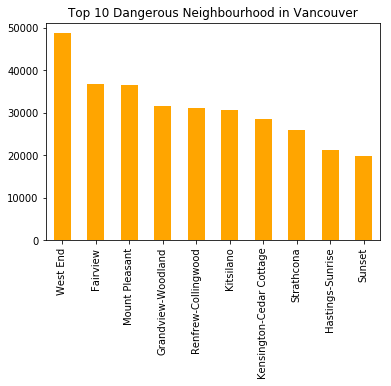

In [139]:
crime_records["NEIGHBOURHOOD"].value_counts()[1:11].plot.bar(
    title='Top 10 Dangerous Neighbourhood in Vancouver', color="orange")
nameplot.set_xlabel('neighhourhood name',size=20)
nameplot.set_ylabel('count',size=20)

It turns out the most crime populated neighbourhood is West End.
Let's use a treemap to visualize crimes in West End

In [140]:
# crimes in west end
west_end_crimes = crime_records_without_offset[crime_records_without_offset["NEIGHBOURHOOD"]=="West End"]
values = west_end_crimes["TYPE"].value_counts()
labels = values.index.tolist()
labels

['Theft from Vehicle',
 'Other Theft',
 'Mischief',
 'Break and Enter Residential/Other',
 'Theft of Bicycle',
 'Break and Enter Commercial',
 'Theft of Vehicle',
 'Vehicle Collision or Pedestrian Struck (with Injury)',
 'Vehicle Collision or Pedestrian Struck (with Fatality)']

In [141]:
values

Theft from Vehicle                                        20401
Other Theft                                                7256
Mischief                                                   6418
Break and Enter Residential/Other                          3649
Theft of Bicycle                                           3449
Break and Enter Commercial                                 3304
Theft of Vehicle                                           2881
Vehicle Collision or Pedestrian Struck (with Injury)       1347
Vehicle Collision or Pedestrian Struck (with Fatality)        8
Name: TYPE, dtype: int64

8 of 1328 collision resulted fatality. The "or" really makes the data unclear and they didn't state the total death count.
Let's combine the last two element of the list together and reduce the string length for better visualization.

In [142]:
labels.pop()
labels[-1] = "Veh. Collis/ Ped Struck"
labels

['Theft from Vehicle',
 'Other Theft',
 'Mischief',
 'Break and Enter Residential/Other',
 'Theft of Bicycle',
 'Break and Enter Commercial',
 'Theft of Vehicle',
 'Veh. Collis/ Ped Struck']

In [143]:
values[-2] += values[-1]
values = values[:len(values)-1]
values

Theft from Vehicle                                      20401
Other Theft                                              7256
Mischief                                                 6418
Break and Enter Residential/Other                        3649
Theft of Bicycle                                         3449
Break and Enter Commercial                               3304
Theft of Vehicle                                         2881
Vehicle Collision or Pedestrian Struck (with Injury)     1355
Name: TYPE, dtype: int64

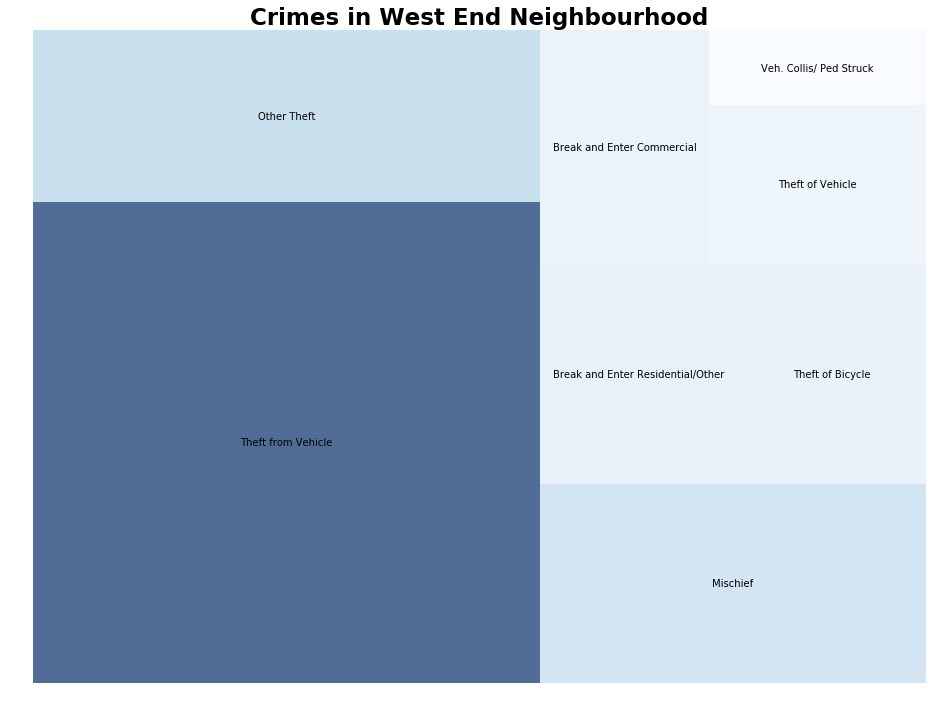

In [144]:
!pip install squarify
import squarify
import matplotlib.colors
import matplotlib.cm

norm = matplotlib.colors.Normalize(vmin=min(values), vmax=max(values))
colors = [matplotlib.cm.Blues(norm(value)) for value in values]

#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 12)
squarify.plot(sizes=values, label=labels, color = colors, alpha=0.7)
plt.title("Crimes in West End Neighbourhood",fontsize=23,fontweight="bold")
plt.axis('off')
plt.show()

Let's take a look the x and y values of the crime happened in West End neighbourhood

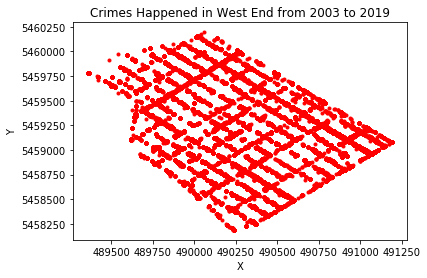

In [145]:
west_end_X = crime_records_without_offset[crime_records_without_offset["NEIGHBOURHOOD"]=="West End"]["X"]
west_end_Y = crime_records_without_offset[crime_records_without_offset["NEIGHBOURHOOD"]=="West End"]["Y"]
plt.scatter(west_end_X,west_end_Y, color="red", marker=".")
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Crimes Happened in West End from 2003 to 2019') 
plt.show()

The scatter plot is actually the shape of the West End neighbourhood.
Crimes happened on almost every street of West End from 2003 to 2019.

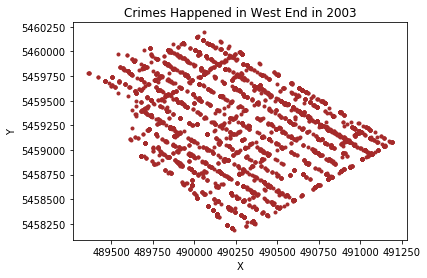

In [146]:
cimes_2003 = crime_records_without_offset[crime_records_without_offset["YEAR"]==2003]
west_end_X_2003 = cimes_2003[cimes_2003["NEIGHBOURHOOD"]=="West End"]["X"]
west_end_Y_2003 = cimes_2003[cimes_2003["NEIGHBOURHOOD"]=="West End"]["Y"]
plt.scatter(west_end_X_2003,west_end_Y_2003, color="brown", marker=".")
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Crimes Happened in West End in 2003') 
plt.show()

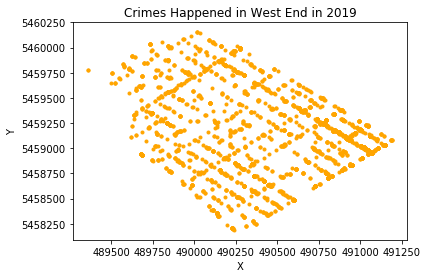

In [147]:
cimes_2019 = crime_records_without_offset[crime_records_without_offset["YEAR"]==2019]
west_end_X_2019 = cimes_2019[cimes_2019["NEIGHBOURHOOD"]=="West End"]["X"]
west_end_Y_2019 = cimes_2019[cimes_2019["NEIGHBOURHOOD"]=="West End"]["Y"]
plt.scatter(west_end_X_2019,west_end_Y_2019, color="orange", marker=".")
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Crimes Happened in West End in 2019') 
plt.show()

Comparing the X, and Y of records from West End, the above plots show the crimes scattered through the neighbourhood and depicted almost the full street map of the West End neighbourhood.

### 9. Vancouver Crimes Heatmap with Folium

Function to convert UTM to Longtitude and Latitude system.

In [148]:
import math

def utmToLatLong(utmEasting, utmNorthing, utmZone):
    eastingOffset = 500000.0
    northingOffset = 10000000.0
    k0 = 0.9996
    equatorialRadius = 6378137.0
    eccSquared = 0.006694380023
    eccPrimeSquared = eccSquared / (1 - eccSquared)
    e1 = (1 - math.sqrt(1 - eccSquared)) / (1 + math.sqrt(1 - eccSquared));
    rad2deg = 180.0/math.pi

    # Casts input from string to floats or ints
    # Removes 500,000 metre offset for longitude
    xUTM = float(utmEasting) - eastingOffset
    yUTM = float(utmNorthing)
    zoneNumber = int(utmZone)

    # Finds the origin longitude for the zone
    lonOrigin = (zoneNumber - 1) * 6 - 180 + 3 # +3 puts in zone centre

    M = yUTM / k0 #This finds the meridional arc
    mu = M / (equatorialRadius * (1- eccSquared / 4 - 3 * eccSquared * eccSquared / 64 -5 * eccSquared * eccSquared * eccSquared /256))

    # Calculates the footprint latitude
    phi1Rad = mu + (3 * e1 / 2 - 27 * e1 * e1 * e1 /32) * math.sin(2*mu) + ( 21 * e1 * e1 / 16 - 55 * e1 * e1 * e1 * e1 / 32) * math.sin( 4 * mu) + (151 * e1 * e1 * e1 / 96) * math.sin(6 * mu)
    phi1 = phi1Rad * rad2deg

    # Variables for conversion equations
    N1 = equatorialRadius / math.sqrt( 1 - eccSquared * math.sin(phi1Rad) *  math.sin(phi1Rad))
    T1 = math.tan(phi1Rad) * math.tan(phi1Rad)
    C1 = eccPrimeSquared * math.cos(phi1Rad) * math.cos(phi1Rad)
    R1 = equatorialRadius * (1 - eccSquared) / math.pow(1 - eccSquared * math.sin(phi1Rad) * math.sin(phi1Rad), 1.5)
    D = xUTM / (N1 * k0)

    # Calculate latitude, in decimal degrees
    lat = phi1Rad - ( N1 * math.tan(phi1Rad) / R1) * (D * D / 2 - (5 + 3 * T1 + 10 * C1 - 4 * C1 * C1 - 9 * eccPrimeSquared) * D * D * D * D / 24 + (61 + 90 * T1 + 298 * C1 + 45 * T1 * T1 - 252 * eccPrimeSquared - 3 * C1 * C1) * D * D * D * D * D * D / 720)
    lat = lat * rad2deg
    
    # Calculate longitude, in decimal degrees
    lon = (D - (1 + 2 * T1 + C1) * D * D * D / 6 + (5 - 2 * C1 + 28 * T1 - 3 * C1 * C1 + 8 * eccPrimeSquared + 24 * T1 * T1) * D * D * D * D * D / 120) / math.cos(phi1Rad)
    lon = lonOrigin + lon * rad2deg
    
    return lon, lat

In [149]:
crime_records_without_offset = crime_records_without_offset.reset_index(drop=True)

In [150]:
crimes_vancouver_X = crime_records_without_offset["X"]
crimes_vancouver_Y = crime_records_without_offset["Y"]
longtitude = []
latitude = []
for i in range(len(crimes_vancouver_X)):
    lon, lat = utmToLatLong(crimes_vancouver_X[i], crimes_vancouver_Y[i], 10)
    longtitude.append(lon)
    latitude.append(lat)

In [151]:
crime_records_without_offset["LONGTITUDE"] = longtitude
crime_records_without_offset["LATITUDE"] = latitude
crime_records_without_offset.head()

TYPE  YEAR  MONTH  DAY  HOUR  MINUTE HUNDRED_BLOCK  \
0  Break and Enter Commercial  2019      3    7     2       6      SITKA SQ   
1  Break and Enter Commercial  2019      8   27     4      12    ALBERNI ST   
2  Break and Enter Commercial  2014      8    8     5      13    ALBERNI ST   
3  Break and Enter Commercial  2005     11   14     3       9    ALBERNI ST   
4  Break and Enter Commercial  2006      5   21     4      50    ALBERNI ST   

  NEIGHBOURHOOD              X             Y  LONGTITUDE   LATITUDE  
0      Fairview  490612.964805  5.457110e+06 -123.129029  49.266678  
1      West End  491007.779775  5.459174e+06 -123.123649  49.285255  
2      West End  491015.943352  5.459166e+06 -123.123536  49.285181  
3      West End  491021.385727  5.459161e+06 -123.123461  49.285132  
4      West End  491021.385727  5.459161e+06 -123.123461  49.285132

We have the latitude and longtitude value now! let's find out where should the neighbourhood be for the record with "S / L 300 BLK E HASTINGS ST" HUNDRED_BLOCK value.

In [152]:
missing_neighbourhood = crime_records_without_offset[crime_records_without_offset["HUNDRED_BLOCK"]=="S / L 300 BLK E HASTINGS ST"]
missing_neighbourhood_Lon = missing_neighbourhood["LONGTITUDE"]
missing_neighbourhood_Lat = missing_neighbourhood["LATITUDE"]
lat_lon_pair = list(zip(missing_neighbourhood_Lat, missing_neighbourhood_Lon))
print("Latitude and Longtitude of the missing neighbourhood row")
lat_lon_pair

Latitude and Longtitude of the missing neighbourhood row


[(49.75531925010842, -124.54975724974244)]

I will use folium for heatmap and clusterMarker data visualization

In [153]:
!pip install folium
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

In [154]:
print("Where is the missing neighbourhood row located?")
missing_neighbourhood_vis = folium.Map(location= [49.4985,-123.8159], 
                           tiles = "Stamen Terrain",
                           zoom_start = 9)
popups = ["Missing Neighbourhood Record"]
MarkerCluster(lat_lon_pair, popups=popups).add_to(missing_neighbourhood_vis)
missing_neighbourhood_vis

Where is the missing neighbourhood row located?


It turns out that's far away from the city of Vancouver. Let's consider it as an outlier and remove it from the dataset.

In [155]:
# not include the row in our analysis
crime_records_without_offset = crime_records_without_offset[crime_records_without_offset["HUNDRED_BLOCK"]!="S / L 300 BLK E HASTINGS ST"]
crime_records_without_offset = crime_records_without_offset.reset_index(drop=True) # reset index
missing_neighbourhood_val_count() # checking missing neighbourhood value

CAMBIE ST BRIDGE                         2
W 41ST AV / W BLVD                       1
WEST 71ST AV/HUDSON ST                   1
PANDORA ST / GILMORE AV                  1
KNIGHT ST / E 63 AV                      1
E 1ST AV / TRANS CANADA HWY              1
E 38TH AV / COMMERCIAL DR                1
RENFREW ST / MCGILL ST                   1
JERVIS ST / 1 BARCLAY ST                 1
W 16TH AV / 3200 HEATHER ST              1
COAL HARBOUR                             1
BLOCK HASTINGS ST                        1
BL E 45TH AV                             1
VICTORIA DR / FINDLAY ST                 1
VANNESS AVE AND JOYCE ST                 1
GRANVILLE ST / W 25TH AV                 1
FRASER ST AND KINGSWAY AVE               1
COLUMBIA ST / 200 W 8TH AV               1
WILLOW ST / W 41 AV                      1
VICTORIA DR AT EAST 22ND AVE             1
N/L 1900 E 41ST AVE                      1
SOUTH LANE 0 E 12TH AVE                  1
KING EDWARD AV / JOHN ST                 1
OAK STREET 

In [156]:
missing_value_describe(crime_records_without_offset)

Number of columns with missing values: 5

Missing percentage (desceding):
LATITUDE         0.021459
LONGTITUDE       0.021459
Y                0.021459
X                0.021459
NEIGHBOURHOOD    0.017883
dtype: float64


In [157]:
crime_records_without_offset = crime_records_without_offset.dropna()

In [158]:
missing_value_describe(crime_records_without_offset)

Number of columns with missing values: 0
No missing data!!!


We don't have row with missing neighbourhood value now!

In [159]:
# return a list of latitude and longtitude data based on specified year
def get_record_locations_by_year(year):
    lat = crime_records_without_offset[crime_records_without_offset["YEAR"]==year]["LATITUDE"]
    lon = crime_records_without_offset[crime_records_without_offset["YEAR"]==year]["LONGTITUDE"]
    return list(zip(lat, lon))

Let's take a look at the crime heatmap of 2019 so far
Feel free to zoom in!

In [160]:
latlon_2019 = get_record_locations_by_year(2019)
crime_heatmap = folium.Map(location= [49.24, -123.11], 
                           tiles = "Stamen Toner",
                           zoom_start = 12)
HeatMap(latlon_2019).add_to(crime_heatmap)
crime_heatmap

It's very crime populated. Let's zoom in to see to the crimes in West End (2019).

In [161]:
# return a list of latitude and longtitude data based on specified year and crime type
def get_record_locations_by_year_and_neighbourhood(year, neighbourhood):
    crimes = crime_records_without_offset[crime_records_without_offset["YEAR"]==year]
    lat = crimes[crimes["NEIGHBOURHOOD"]==neighbourhood]["LATITUDE"]
    lon = crimes[crimes["NEIGHBOURHOOD"]==neighbourhood]["LONGTITUDE"]
    return list(zip(lat, lon))

In [162]:
latlon_west_end_2019 = get_record_locations_by_year_and_neighbourhood(2019, "West End")
crime_heatmap = folium.Map(location= [49.28416, -123.13150], 
                           tiles = "Stamen Toner",
                           zoom_start = 15)
HeatMap(latlon_west_end_2019).add_to(crime_heatmap)
crime_heatmap

In [163]:
# return a list of latitude and longtitude data based on specified year and crime type
def get_record_locations_by_year_and_type(year, crime_type):
    crimes = crime_records_without_offset[crime_records_without_offset["YEAR"]==year]
    lat = crimes[crimes["TYPE"]==crime_type]["LATITUDE"]
    lon = crimes[crimes["TYPE"]==crime_type]["LONGTITUDE"]
    return list(zip(lat, lon))

# return a list of latitude and longtitude data based on specified year and crime type
def get_record_locations_by_year_type_neighbourhood(year, crime_type, neighbourhood):
    crimes = crime_records_without_offset[crime_records_without_offset["YEAR"]==year]
    crimes = crimes[crimes["NEIGHBOURHOOD"]==neighbourhood]
    lat = crimes[crimes["TYPE"]==crime_type]["LATITUDE"]
    lon = crimes[crimes["TYPE"]==crime_type]["LONGTITUDE"]
    return list(zip(lat, lon))

Let's take look at the "Theft from Vehicle" crimes in West End (2019)

In [164]:
print("West End 'Theft from Vehicle' Crimes Heatmap in 2019")
latlon_west_end_2019 = get_record_locations_by_year_type_neighbourhood(2019, "Theft from Vehicle", "West End")
west_end_TFC = folium.Map(location= [49.28416, -123.13150], 
                           tiles = "Stamen Terrain",
                           zoom_start = 15)
popups = ["Theft from Vehicle" for _ in range(len(latlon_west_end_2019))] # Popups texts are simple numbers.
MarkerCluster(latlon_west_end_2019, popups=popups).add_to(west_end_TFC)
west_end_TFC

West End 'Theft from Vehicle' Crimes Heatmap in 2019


Let's apply same type of graph to Stanley Park, which is popular sight.


In [165]:
print("Crimes happened in Stanley Park in 2019 so far")
latlon_stanely_park_2019 = get_record_locations_by_year_and_neighbourhood(2019, "Stanley Park")
crime_heatmap = folium.Map(location= [49.30330, -123.14635], 
                           tiles = "Stamen Toner",
                           zoom_start = 15)
HeatMap(latlon_stanely_park_2019).add_to(crime_heatmap)
crime_heatmap

Crimes happened in Stanley Park in 2019 so far


In [166]:
def get_crime_types(year, neighbourhood):
    crimes = crime_records_without_offset[crime_records_without_offset["YEAR"]==year]
    crime_types = crimes[crimes["NEIGHBOURHOOD"]==neighbourhood]["TYPE"]
    return crime_types

In [167]:
print("Crimes happened in Stanley Park in 2019 so far")
latlon_stanely_park_2019 = get_record_locations_by_year_and_neighbourhood(2019, "Stanley Park")
crime_clusterMarkers = folium.Map(location= [49.30330, -123.14635], 
                           tiles = "Stamen Toner",
                           zoom_start = 15)
popups = [i for i in get_crime_types(2019, "Stanley Park")] # Popups texts are simple numbers.
MarkerCluster(latlon_stanely_park_2019, popups=popups).add_to(crime_clusterMarkers)
crime_clusterMarkers

Crimes happened in Stanley Park in 2019 so far


From the clustered markers, you can see where are the commericial building and where are the popular bicylce

### 10. Vancouver crime data comments

Through this exploratory analysis of the Vancouver crime data:
1. I found that the most common crime in Vancouver is related to vehicle such "Theft of Vehicle", "Theft of Bicycle" and "Vehicle Collision". Definitely, watch out for your bikes, motocycle, and cars.
2. West End neighbourhood remain the most crime populated area from 2003 to 2019. The location record of crimes committed in West End can be used to draw a clear street map of West End.
3. The ocurrences of crimes are quite evenly distributed if crimes are counted by day or counted by month. However, crime occurs more in after work hours and midnight in Vancouver.

### 11. Exploring venues in the top 10 most dangerous neighbourhood in Vancouver using Foursquare API

#### 11.0 Cluster

In [168]:
crime_records_without_offset.head()

TYPE  YEAR  MONTH  DAY  HOUR  MINUTE HUNDRED_BLOCK  \
0  Break and Enter Commercial  2019      3    7     2       6      SITKA SQ   
1  Break and Enter Commercial  2019      8   27     4      12    ALBERNI ST   
2  Break and Enter Commercial  2014      8    8     5      13    ALBERNI ST   
3  Break and Enter Commercial  2005     11   14     3       9    ALBERNI ST   
4  Break and Enter Commercial  2006      5   21     4      50    ALBERNI ST   

  NEIGHBOURHOOD              X             Y  LONGTITUDE   LATITUDE  
0      Fairview  490612.964805  5.457110e+06 -123.129029  49.266678  
1      West End  491007.779775  5.459174e+06 -123.123649  49.285255  
2      West End  491015.943352  5.459166e+06 -123.123536  49.285181  
3      West End  491021.385727  5.459161e+06 -123.123461  49.285132  
4      West End  491021.385727  5.459161e+06 -123.123461  49.285132

#### 11.1 Define Foursquare Credentials and Version

In [169]:
# create map of Vancouver using latitude and longitude values
map_Vancouver = folium.Map(location=[49.30330, -123.14635], zoom_start=13)

folium.CircleMarker(
    radius=50,
    location=[49.285646, -123.13062],
    popup='West End',
    color='crimson',
    fill=False,
).add_to(map_Vancouver)

folium.CircleMarker(
    location=[49.2666, -123.12902],
    radius=50,
    popup='Faireview',
    color='#3186cc',
    fill=True,
    fill_color='#3186cc'
).add_to(map_Vancouver)

map_Vancouver

In [170]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: JN4A3W4535BG44IBDVBO2GNZAJFZRHVIDCPX3V1MXXXDG3I2
CLIENT_SECRET:CEOFJU0L3UDLQPCTN3EIRUSPXMWSREGHV20GQWAJ04XDM4C0


#### 11.2 Exploring Fairview

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent foursquare_agent, as shown below.

In [171]:
address = 'Vancouver, Canada'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

49.2608724 -123.1139529


In [172]:
latitude = 49.2608724
longitude = -123.1139529

Search for a specific venue category

In [173]:
search_query = 'Restaurant'
radius = 500
print(search_query + ' .... OK!')

Restaurant .... OK!


Define the corresponding URL

In [174]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=JN4A3W4535BG44IBDVBO2GNZAJFZRHVIDCPX3V1MXXXDG3I2&client_secret=CEOFJU0L3UDLQPCTN3EIRUSPXMWSREGHV20GQWAJ04XDM4C0&ll=49.2608724,-123.1139529&v=20180604&query=Restaurant&radius=500&limit=30'

Send the GET Request and examine the results

In [175]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e6668f2df2774001b21291d'},
 'response': {'venues': [{'id': '4aa7fa5ef964a5206d4e20e3',
    'name': 'Kirin Seafood Restaurant 玉麒麟海鮮酒家 (Kirin Seafood Restaurant)',
    'location': {'address': '201-555 W. 12th Ave.',
     'crossStreet': 'at Cambie St.',
     'lat': 49.260866232128805,
     'lng': -123.11542079687536,
     'labeledLatLngs': [{'label': 'display',
       'lat': 49.260866232128805,
       'lng': -123.11542079687536}],
     'distance': 106,
     'postalCode': 'V5Z 3X7',
     'cc': 'CA',
     'city': 'Vancouver',
     'state': 'BC',
     'country': 'Canada',
     'formattedAddress': ['201-555 W. 12th Ave. (at Cambie St.)',
      'Vancouver BC V5Z 3X7',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d145941735',
      'name': 'Chinese Restaurant',
      'pluralName': 'Chinese Restaurants',
      'shortName': 'Chinese',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_',
       'suffix': '.png'},
      '

Get relevant part of JSON and transform it into a pandas dataframe

In [176]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

categories  hasPerk  \
0  [{'id': '4bf58dd8d48988d145941735', 'name': 'C...    False   
1  [{'id': '4bf58dd8d48988d145941735', 'name': 'C...    False   
2                                                 []    False   
3  [{'id': '4bf58dd8d48988d121941735', 'name': 'L...    False   
4  [{'id': '4bf58dd8d48988d10f941735', 'name': 'I...    False   

                         id      location.address location.cc location.city  \
0  4aa7fa5ef964a5206d4e20e3  201-555 W. 12th Ave.          CA     Vancouver   
1  4ab04bfaf964a520ed6620e3        532 W Broadway          CA     Vancouver   
2  542d0404498eabf6092127b4                   NaN          CA     Vancouver   
3  4aa7ebd3f964a520034e20e3         500 West 12th          CA     Vancouver   
4  4f496e68e4b05ebee07f7c18                   NaN          CA           NaN   

  location.country location.crossStreet  location.distance  \
0           Canada        at Cambie St.                106   
1           Canada    btwn Cambie & Ash                280   
2           Canada                  NaN                 39   
3           Canada      @ Cambie Street                 51   
4           Canada                  NaN                180   

                           location.formattedAddress  \
0  [201-555 W. 12th Ave. (at Cambie St.), Vancouv...   
1  [532 W Broadway (btwn Cambie & Ash), Vancouver...   
2                             [Vancouver BC, Canada]   
3  [500 West 12th (@ Cambie Street), Vancouver BC...   
4                                           [Canada]   

                             location.labeledLatLngs  location.lat  \
0  [{'label': 'display', 'lat': 49.26086623212880...     49.260866   
1  [{'label': 'display', 'lat': 49.26308576804986...     49.263086   
2  [{'label': 'display', 'lat': 49.261226, 'lng':...     49.261226   
3  [{'label': 'display', 'lat': 49.26058096625587...     49.260581   
4  [{'label': 'display', 'lat': 49.26097253789107...     49.260973   

   location.lng location.postalCode location.state  \
0   -123.115421             V5Z 3X7             BC   
1   -123.115808             V5Z 1E9             BC   
2   -123.113927                 NaN             BC   
3   -123.114502             V5Z 1M2             BC   
4   -123.116429                 NaN            NaN   

                                                name    referralId  \
0  Kirin Seafood Restaurant 玉麒麟海鮮酒家 (Kirin Seafoo...  v-1583769715   
1                           Peaceful Restaurant 和平饭店  v-1583769715   
2                                     SBC Restaurant  v-1583769715   
3                        FigMint Restaurant & Lounge  v-1583769715   
4                             Curry Point Restaurant  v-1583769715   

  venuePage.id  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

Define information of interest and filter dataframe

In [177]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

name           categories  \
0   Kirin Seafood Restaurant 玉麒麟海鮮酒家 (Kirin Seafoo...   Chinese Restaurant   
1                            Peaceful Restaurant 和平饭店   Chinese Restaurant   
2                                      SBC Restaurant                 None   
3                         FigMint Restaurant & Lounge               Lounge   
4                              Curry Point Restaurant    Indian Restaurant   
5                                  New Sun Restaurant   Chinese Restaurant   
6                        Kanpachi Japanese Restaurant  Japanese Restaurant   
7                      Old Ginger Szechuan Restaurant   Chinese Restaurant   
8                              Shanghai Lu Restaurant     Asian Restaurant   
9                                     Toko Restaurant   Chinese Restaurant   
10                                    Yolks Breakfast       Breakfast Spot   
11                               Chef Lekker Catering         Food Service   
12                                              Shiro  Japanese Restaurant   

                  address  cc       city country                  crossStreet  \
0    201-555 W. 12th Ave.  CA  Vancouver  Canada                at Cambie St.   
1          532 W Broadway  CA  Vancouver  Canada            btwn Cambie & Ash   
2                     NaN  CA  Vancouver  Canada                          NaN   
3           500 West 12th  CA  Vancouver  Canada              @ Cambie Street   
4                     NaN  CA        NaN  Canada                          NaN   
5         2925 Cambie St.  CA  Vancouver  Canada                          NaN   
6       457 West Broadway  CA  Vancouver  Canada                       Cambie   
7       514 West Broadway  CA  Vancouver  Canada                       Cambie   
8   705 W Broadway Street  CA  Vancouver  Canada               Heather Street   
9          223 W 7th Ave.  CA  Vancouver  Canada  btwn Columbia & Alberta St.   
10      546 West Broadway  CA  Vancouver  Canada                Cambie Street   
11                    NaN  CA  Vancouver  Canada                          NaN   
12         3096 Cambie St  CA  Vancouver  Canada                          NaN   

    distance                                   formattedAddress  \
0        106  [201-555 W. 12th Ave. (at Cambie St.), Vancouv...   
1        280  [532 W Broadway (btwn Cambie & Ash), Vancouver...   
2         39                             [Vancouver BC, Canada]   
3         51  [500 West 12th (@ Cambie Street), Vancouver BC...   
4        180                                           [Canada]   
5        198            [2925 Cambie St., Vancouver BC, Canada]   
6        270  [457 West Broadway (Cambie), Vancouver BC V5Y ...   
7        304  [514 West Broadway (Cambie), Vancouver BC V5Z ...   
8        519  [705 W Broadway Street (Heather Street), Vanco...   
9        516  [223 W 7th Ave. (btwn Columbia & Alberta St.),...   
10       307  [546 West Broadway (Cambie Street), Vancouver ...   
11       626                      [Vancouver BC v5z3k7, Canada]   
12       332     [3096 Cambie St, Vancouver BC V5Z 2V9, Canada]   

                                       labeledLatLngs        lat         lng  \
0   [{'label': 'display', 'lat': 49.26086623212880...  49.260866 -123.115421   
1   [{'label': 'display', 'lat': 49.26308576804986...  49.263086 -123.115808   
2   [{'label': 'display', 'lat': 49.261226, 'lng':...  49.261226 -123.113927   
3   [{'label': 'display', 'lat': 49.26058096625587...  49.260581 -123.114502   
4   [{'label': 'display', 'lat': 49.26097253789107...  49.260973 -123.116429   
5   [{'label': 'display', 'lat': 49.25924486407776...  49.259245 -123.115086   
6   [{'label': 'display', 'lat': 49.263295, 'lng':...  49.263295 -123.114266   
7   [{'label': 'display', 'lat': 49.263337, 'lng':...  49.263337 -123.115772   
8   [{'label': 'display', 'lat': 49.26346634998160...  49.263466 -123.119901   
9   [{'label': 'display', 'lat': 49.26476351616346...  49.264764 -123.110069   
10

Let's visualize the Restaurants that are nearby

In [178]:
dataframe_filtered.name

0     Kirin Seafood Restaurant 玉麒麟海鮮酒家 (Kirin Seafoo...
1                              Peaceful Restaurant 和平饭店
2                                        SBC Restaurant
3                           FigMint Restaurant & Lounge
4                                Curry Point Restaurant
5                                    New Sun Restaurant
6                          Kanpachi Japanese Restaurant
7                        Old Ginger Szechuan Restaurant
8                                Shanghai Lu Restaurant
9                                       Toko Restaurant
10                                      Yolks Breakfast
11                                 Chef Lekker Catering
12                                                Shiro
Name: name, dtype: object

In [179]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around Vancouver City Hall

# add a red circle marker to represent Vancouver City Hall
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Vancouver City Hall',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

#### 11.3 West End 

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent foursquare_agent, as shown below.

In [180]:
address = '550 W Hastings St, Vancouver, Canada'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

49.28413365 -123.11268308112355


Search for a specific venue category

In [181]:
search_query = 'Restaurant'
radius = 500
print(search_query + ' .... OK!')

Restaurant .... OK!


Define the corresponding URL

In [182]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=JN4A3W4535BG44IBDVBO2GNZAJFZRHVIDCPX3V1MXXXDG3I2&client_secret=CEOFJU0L3UDLQPCTN3EIRUSPXMWSREGHV20GQWAJ04XDM4C0&ll=49.28413365,-123.11268308112355&v=20180604&query=Restaurant&radius=500&limit=30'

Send the GET Request and examine the results

In [183]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e6667d671c428001b628330'},
 'response': {'venues': [{'id': '4aa82b93f964a520c84f20e3',
    'name': "Yagger's Downtown Restaurant & Sports Bar",
    'location': {'address': '433 West Pender',
     'crossStreet': 'Homer',
     'lat': 49.28316092121001,
     'lng': -123.11250289255702,
     'labeledLatLngs': [{'label': 'display',
       'lat': 49.28316092121001,
       'lng': -123.11250289255702}],
     'distance': 109,
     'postalCode': 'V6B 1V2',
     'cc': 'CA',
     'city': 'Vancouver',
     'state': 'BC',
     'country': 'Canada',
     'formattedAddress': ['433 West Pender (Homer)',
      'Vancouver BC V6B 1V2',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d11d941735',
      'name': 'Sports Bar',
      'pluralName': 'Sports Bars',
      'shortName': 'Sports Bar',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/sportsbar_',
       'suffix': '.png'},
      'primary': True}],
    'venuePage': {'id': '4149692

Get relevant part of JSON and transform it into a pandas dataframe

In [184]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
westend = json_normalize(venues)
westend.head()

categories  hasPerk  \
0  [{'id': '4bf58dd8d48988d11d941735', 'name': 'S...    False   
1  [{'id': '4bf58dd8d48988d121941735', 'name': 'L...    False   
2  [{'id': '4bf58dd8d48988d145941735', 'name': 'C...    False   
3  [{'id': '4bf58dd8d48988d145941735', 'name': 'C...    False   
4  [{'id': '4bf58dd8d48988d143941735', 'name': 'B...    False   

                         id  location.address location.cc location.city  \
0  4aa82b93f964a520c84f20e3   433 West Pender          CA     Vancouver   
1  4d2cce46ae3a8cfa4067bf70  801 W Georgia St          CA     Vancouver   
2  576c4083498e4989bae8764a    602 Seymour St          CA     Vancouver   
3  50022eace4b0fbfbe9a7d77e   469 Richards St          CA     Vancouver   
4  4aa837e6f964a5202c5020e3  332 Water Street          CA     Vancouver   

  location.country location.crossStreet  location.distance  \
0           Canada                Homer                109   
1           Canada           at Howe St                499   
2           Canada       at Dunsmuir St                240   
3           Canada       at W Pender St                 58   
4           Canada        Cambie Street                232   

                           location.formattedAddress  \
0  [433 West Pender (Homer), Vancouver BC V6B 1V2...   
1  [801 W Georgia St (at Howe St), Vancouver BC V...   
2  [602 Seymour St (at Dunsmuir St), Vancouver BC...   
3  [469 Richards St (at W Pender St), Vancouver B...   
4  [332 Water Street (Cambie Street), Vancouver B...   

                             location.labeledLatLngs  location.lat  \
0  [{'label': 'display', 'lat': 49.28316092121001...     49.283161   
1  [{'label': 'display', 'lat': 49.28336228267866...     49.283362   
2  [{'label': 'display', 'lat': 49.28292966132952...     49.282930   
3  [{'label': 'display', 'lat': 49.28361009495606...     49.283610   
4  [{'label': 'display', 'lat': 49.2843757721172,...     49.284376   

   location.lng location.neighborhood location.postalCode location.state  \
0   -123.112503                   NaN             V6B 1V2             BC   
1   -123.119462                   NaN             V6P 1C7             BC   
2   -123.115428                   NaN                 NaN             BC   
3   -123.112657                   NaN             V6B 6H6             BC   
4   -123.109509                   NaN             V6B 1B6             BC   

                                        name    referralId venuePage.id  
0  Yagger's Downtown Restaurant & Sports Bar  v-1583769754     41496929  
1                      Hawksworth Restaurant  v-1583769754     77577037  
2                        Peaceful Restaurant  v-1583769754          NaN  
3     Shanghai Xiao Long Bao Restaurant 上海九鼎  v-1583769754          NaN  
4                        McLean's Restaurant  v-1583769754          NaN

Define information of interest and filter dataframe

In [185]:
# keep only columns that include venue name, and anything that is associated with location
filtered_westend_columns = ['name', 'categories'] + [col for col in westend.columns if col.startswith('location.')] + ['id']
westend = westend.loc[:, filtered_westend_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
westend['categories'] = westend.apply(get_category_type, axis=1)

# clean column names by keeping only last term
westend.columns = [column.split('.')[-1] for column in westend.columns]

westend

name                  categories  \
0   Yagger's Downtown Restaurant & Sports Bar                  Sports Bar   
1                       Hawksworth Restaurant                      Lounge   
2                         Peaceful Restaurant          Chinese Restaurant   
3      Shanghai Xiao Long Bao Restaurant 上海九鼎          Chinese Restaurant   
4                         McLean's Restaurant              Breakfast Spot   
5                             Miku Restaurant         Japanese Restaurant   
6                        Manhattan Restaurant         American Restaurant   
7       Top of Vancouver Revolving Restaurant         American Restaurant   
8                            Smile Restaurant                       Diner   
9                      Snow Garden Restaurant          Chinese Restaurant   
10                   Century Restaurant & Bar                         Pub   
11                      Five Sails Restaurant  Financial or Legal Service   
12                  Joyeaux Cafe & Restaurant       Vietnamese Restaurant   
13                      Oceans 999 Restaurant                      Lounge   
14             Chelsea Restaurant at Days Inn              Breakfast Spot   
15                        W. Restaurant + Bar            Sushi Restaurant   
16                 Kimono Japanese Restaurant         Japanese Restaurant   
17                    Jade Dynasty Restaurant          Chinese Restaurant   
18                              Century House   Latin American Restaurant   
19                      JOEY Restaurant Group                      Office   
20                     Wild salmon restaurant                  Restaurant   
21                   Yume Japanese Restaurant         Japanese Restaurant   
22              Fumiyoshi Japanese Restaurant         Japanese Restaurant   
23              Chelsea Restaurant and Lounge              Breakfast Spot   
24                            Lido Restaurant                  Restaurant   
25                           ARC Food + Drink                  Restaurant   
26                                        A&W        Fast Food Restaurant   
27                                    Chambar          Belgian Restaurant   
28                                       和平饭店          Chinese Restaurant   
29                          YEW seafood + bar          Seafood Restaurant   

                          address  cc                            city country  \
0                 433 West Pender  CA                       Vancouver  Canada   
1                801 W Georgia St  CA                       Vancouver  Canada   
2                  602 Seymour St  CA                       Vancouver  Canada   
3                 469 Richards St  CA                       Vancouver  Canada   
4                332 Water Street  CA                       Vancouver  Canada   
5            200 Granville Street  CA                       Vancouver  Canada   
6        550 West Hastings Street  CA                       Vancouver  Canada   
7               555 W Hastings St  CA                       Vancouver  Canada   
8             424 West Pender St.  CA                       Vancouver  Canada   
9                 469 Richards St  CA                       Vancouver  Canada   
10                462 Richards St  CA  Greater Vancouver Regional Dis  Canada   
11                  999 Canada Pl  CA                       Vancouver  Canada   
12                551 Howe Street  CA                       Vancouver  Canada   
13               999 Canada Place  CA                       Vancouver  Canada   
14     921 W Pender (lower level)  CA                       Vancouver  Canada   
15                117 W Pender St  CA                       Vancouver  Canada   
16               433 Granville St  CA                       Vancouver  Canada   
17                            NaN  CA                             NaN  Canada   
18               432 Richards St.  CA                       Vancouver  Canada   
19                            NaN

Let's visualize the Restaurants that are nearby

In [186]:
westend.name

0     Yagger's Downtown Restaurant & Sports Bar
1                         Hawksworth Restaurant
2                           Peaceful Restaurant
3        Shanghai Xiao Long Bao Restaurant 上海九鼎
4                           McLean's Restaurant
5                               Miku Restaurant
6                          Manhattan Restaurant
7         Top of Vancouver Revolving Restaurant
8                              Smile Restaurant
9                        Snow Garden Restaurant
10                     Century Restaurant & Bar
11                        Five Sails Restaurant
12                    Joyeaux Cafe & Restaurant
13                        Oceans 999 Restaurant
14               Chelsea Restaurant at Days Inn
15                          W. Restaurant + Bar
16                   Kimono Japanese Restaurant
17                      Jade Dynasty Restaurant
18                                Century House
19                        JOEY Restaurant Group
20                       Wild salmon res

In [187]:
westend_map = folium.Map(location=[49.28413365, -123.11268308112355], zoom_start=13) # generate map centred around the Delta Hotels

# add a red circle marker to represent the Delta Hotels
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Delta Hotels',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(westend_map)

# add the Restaurants as blue circle markers
for lat, lng, label in zip(westend.lat, westend.lng, westend.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(westend_map)

# display map
westend_map

## 12. Discussion:

The aim of this project is to help people who want to relocate to the safest borough in Vancouver, expats can chose the neighborhoods to which they want to relocate based on the most common venues in it. But most important is to chose a neighborhood with a relative high safety index like Hasting-Sunrise and Sunset.

Through this exploratory analysis of the Vancouver crime data:

1. I found that the most common crime in Vancouver is related to vehicle such "Theft of Vehicle", "Theft of Bicycle" and "Vehicle Collision". Definitely, watch    out for your bikes, motorcycle, and cars.

2. West End neighbourhood remain the most crime populated area from 2003 to 2019. The location record of crimes committed in West End can be used to draw a        clear street map of West End.

3. The occurrences of crimes are quite evenly distributed if crimes are counted by day or counted by month. However, crime occurs more in after work hours and    midnight in Vancouver.

## 13. Conclusion:
Through this exploratory analysis of the Vancouver crime data:
1. I found that the most common crime in Vancouver is related to vehicle such "Theft of Vehicle", "Theft of Bicycle" and "Vehicle Collision". Definitely, watch out for your bikes, motocycle, and cars.
2. West End neighbourhood remain the most crime populated area from 2003 to 2019. The location record of crimes committed in West End can be used to draw a clear street map of West End.
3. The ocurrences of crimes are quite evenly distributed if crimes are counted by day or counted by month. However, crime occurs more in after work hours and midnight in Vancouver.
#### First, let me start with "Theft of Vehicle:
It had a major decrease, from an average of around 520 crimes per month in 2003 to around 100 in 2012. That's impressive!
Although the average has been increasing in the past years, it's way below 2003.
In 2002, the "Bait Car" program was launched and in 2003 the IMPACT group was formed in response to this peak in theft. It looks like they've been doing a great job!
Side note: I wonder if this decrease of around 80% in the number of theft had any impact on insurance policies prices...
#### Second, about "Other Theft":
On the opposite trend, other theft has been increasing, from around 200 to almost 500 crimes per month.
Is it because stealing a car became too risky, but thieves still need to "make a living"?
About "Theft from Vehicle":
It is the most frequent type.
It decreased along with "Theft of Vehicle" until 2012, but then it increased significantly.
Finally, about "Theft of Bicycle":
We can see a clear trend within the year. It has peaks during summer months, which is expected.
The average has also been increasing.

Richard Balbuena